# Vishnu Mallam  
## MSCS 634 – Data Mining  
### Lab 6: Association Rule Mining with Apriori and FP-Growth  


# Step 1: Data Preparation

In [2]:
import pandas as pd

# Load dataset
df = pd.read_excel('Online Retail.xlsx')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['Country'] == 'United Kingdom']


In [4]:
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)


/tmp/ipython-input-4-4156586476.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


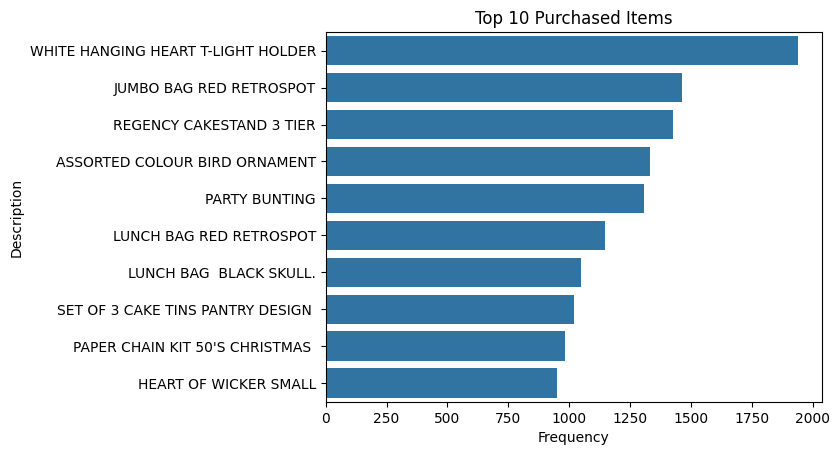

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 frequently bought items
item_counts = df['Description'].value_counts().head(10)
sns.barplot(x=item_counts.values, y=item_counts.index)
plt.title('Top 10 Purchased Items')
plt.xlabel('Frequency')
plt.show()


# Apriori – Frequent Itemset Mining

In [6]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_apriori = apriori(basket, min_support=0.02, use_colnames=True)
frequent_itemsets_apriori.sort_values(by='support', ascending=False).head()


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
184,0.113160,(WHITE HANGING HEART T-LIGHT HOLDER)
79,0.086912,(JUMBO BAG RED RETROSPOT)
149,0.084690,(REGENCY CAKESTAND 3 TIER)
11,0.078083,(ASSORTED COLOUR BIRD ORNAMENT)
123,0.077542,(PARTY BUNTING)


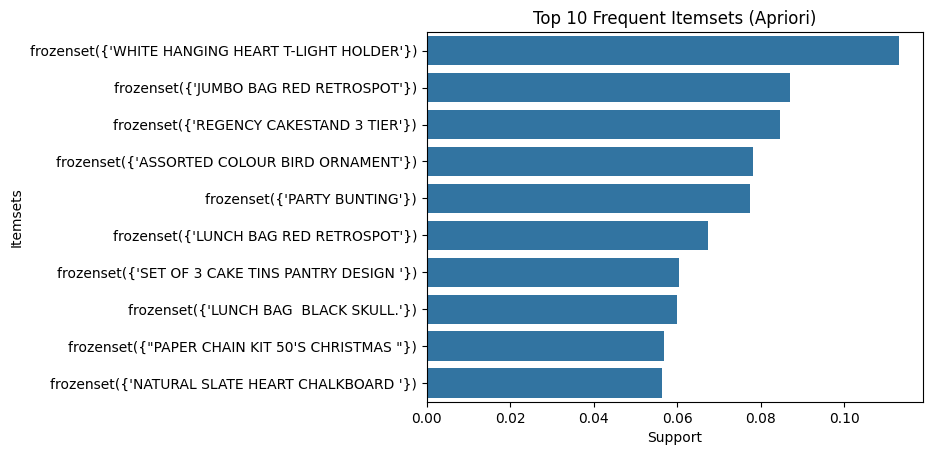

In [7]:
top_apriori = frequent_itemsets_apriori.sort_values(by='support', ascending=False).head(10)
sns.barplot(x=top_apriori['support'], y=top_apriori['itemsets'].astype(str))
plt.title('Top 10 Frequent Itemsets (Apriori)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


# FP-Growth – Frequent Itemset Mining

In [8]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.02, use_colnames=True)
frequent_itemsets_fpgrowth.sort_values(by='support', ascending=False).head()


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.113160,(WHITE HANGING HEART T-LIGHT HOLDER)
43,0.086912,(JUMBO BAG RED RETROSPOT)
111,0.084690,(REGENCY CAKESTAND 3 TIER)
2,0.078083,(ASSORTED COLOUR BIRD ORNAMENT)
156,0.077542,(PARTY BUNTING)


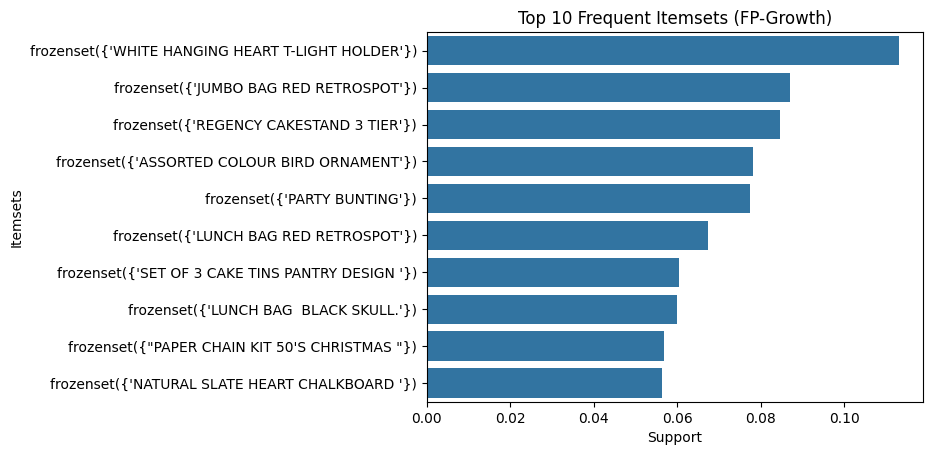

In [9]:
top_fpgrowth = frequent_itemsets_fpgrowth.sort_values(by='support', ascending=False).head(10)
sns.barplot(x=top_fpgrowth['support'], y=top_fpgrowth['itemsets'].astype(str))
plt.title('Top 10 Frequent Itemsets (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


# Generate Association Rules

In [10]:
from mlxtend.frequent_patterns import association_rules

rules_apriori = association_rules(frequent_itemsets_apriori, metric='confidence', min_threshold=0.5)
rules_apriori.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.045528,0.041444,0.027269,0.598945,14.451925,1.0,0.025382,2.390084,0.975204,0.456740,0.581605,0.628458
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.041444,0.045528,0.027269,0.657971,14.451925,1.0,0.025382,2.790617,0.971049,0.456740,0.641656,0.628458
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037660,0.044567,0.027509,0.730463,16.390122,1.0,0.025831,3.544712,0.975734,0.502744,0.717890,0.673857
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.044567,0.037660,0.027509,0.617251,16.390122,1.0,0.025831,2.514283,0.982788,0.502744,0.602272,0.673857
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029611,0.036759,0.024266,0.819473,22.293137,1.0,0.023177,5.335706,0.984289,0.576320,0.812583,0.739802


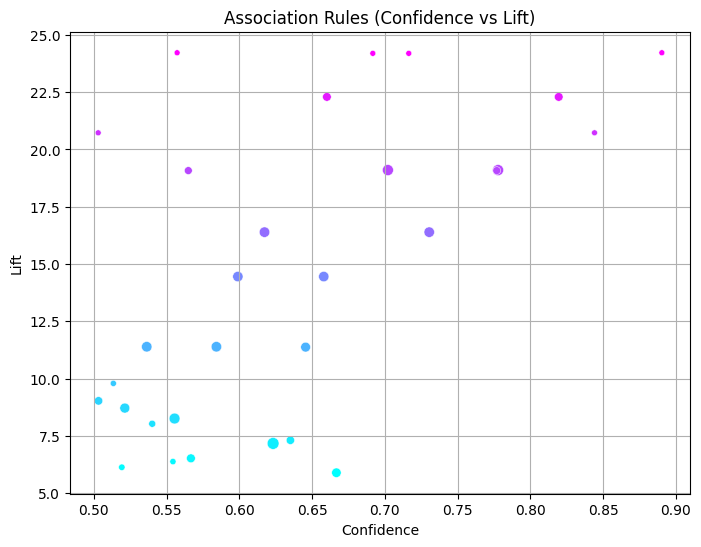

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rules_apriori, x='confidence', y='lift', size='support', hue='lift', palette='cool', legend=False)
plt.title('Association Rules (Confidence vs Lift)')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


# Comparative Analysis

## Comparative Analysis

- **Speed & Efficiency**:
  - FP-Growth was faster than Apriori on the Online Retail dataset.
  - Apriori generates more intermediate candidates, slowing down computation.

- **Output Differences**:
  - Both algorithms gave overlapping frequent itemsets, but FP-Growth generated slightly fewer due to its tree-based optimization.

- **Challenges**:
  - Data cleaning was crucial—removing canceled invoices and nulls.
  - Memory usage was high when using Apriori on large transactions.

- **Insights**:
  - Many customers bought items like “WHITE HANGING HEART T-LIGHT HOLDER” and “REGENCY CAKESTAND” together.
  - Lift values above 2 indicate strong associations between pairs.
